In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Naive Bayes
"""
1- Multinomial NB: çoğunlukla döküman sınıflandırma prob. kullanılır. 
2- Bernoulli NB: boolean değişkenler kullanılır (yes/no)
3- Gaussian NB: normal dağılımlı sürekli değerler 
"""

'\n1- Multinomial NB: çoğunlukla döküman sınıflandırma prob. kullanılır. \n2- Bernoulli NB: boolean değişkenler kullanılır (yes/no)\n3- Gaussian NB: normal dağılımlı sürekli değerler \n'

In [3]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


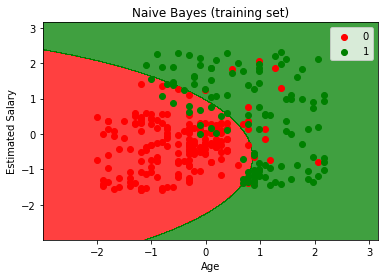

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Naive Bayes (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


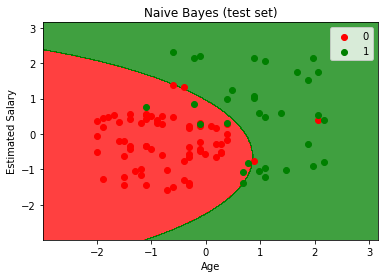

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [12]:
#Karar Ağaçları (Decision Tree)

In [ ]:
"""
Kök düğüm belirleme yöntemleri:
1- Entropy  
2- Information Gain (Bilgi Kazancı) 
3- Gini Impurity 
"""

In [13]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 4 28]]


In [26]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
from sklearn import tree

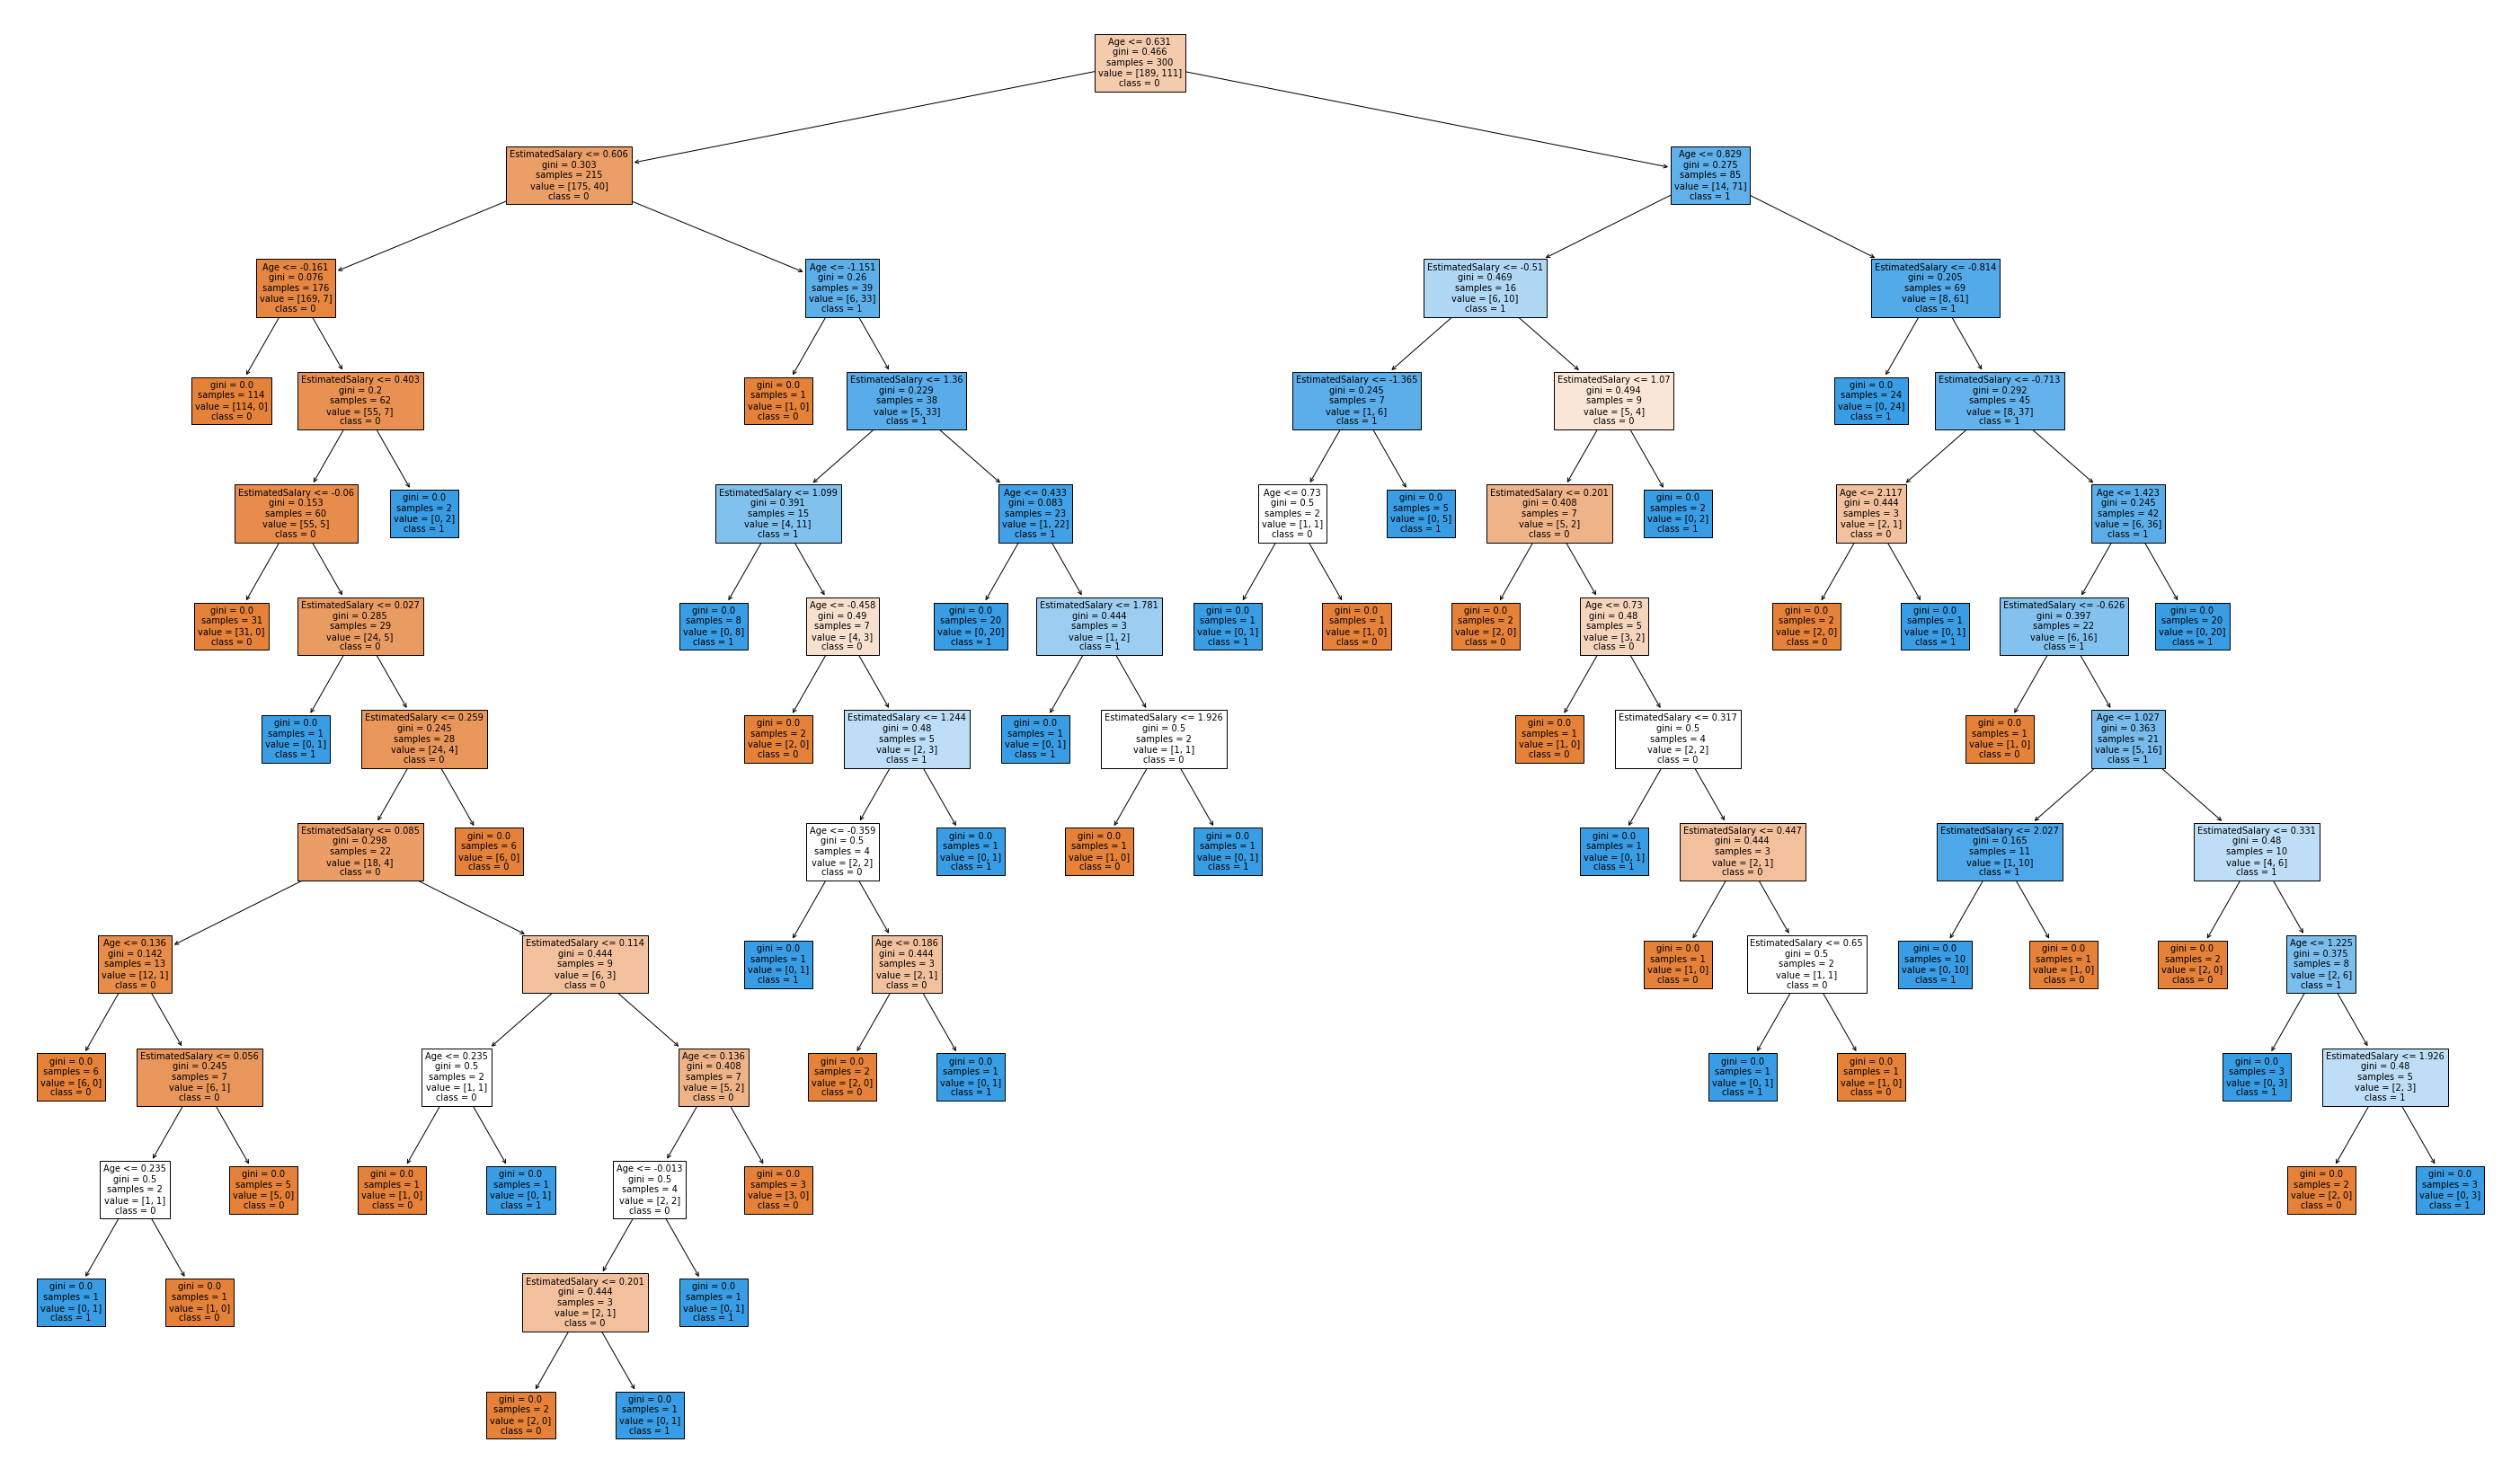

In [28]:
fn = ['Age', 'EstimatedSalary']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50, 30))
tree.plot_tree(classifier, feature_names = fn, class_names = cn, filled = True)
fig.savefig('AIUPBootcamp1.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


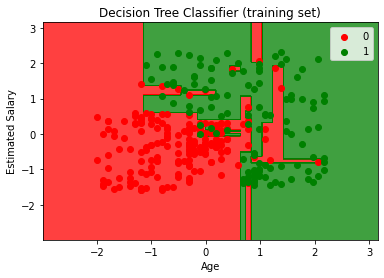

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree Classifier (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


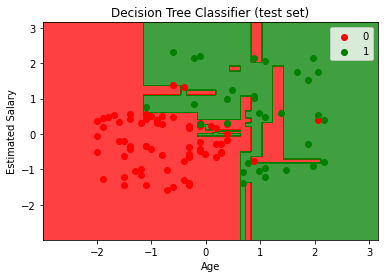

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree Classifier (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [32]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('data/pima-indians-diabetes.csv', header = None, names = col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
X = pima.iloc[:, [0,1,2,3,4,5,6,7]].values
y = pima.iloc[:, -1].values

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = clf.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)

result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[116  30]
 [ 42  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       146
           1       0.59      0.51      0.54        85

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.68       231

Accuracy: 0.6883116883116883


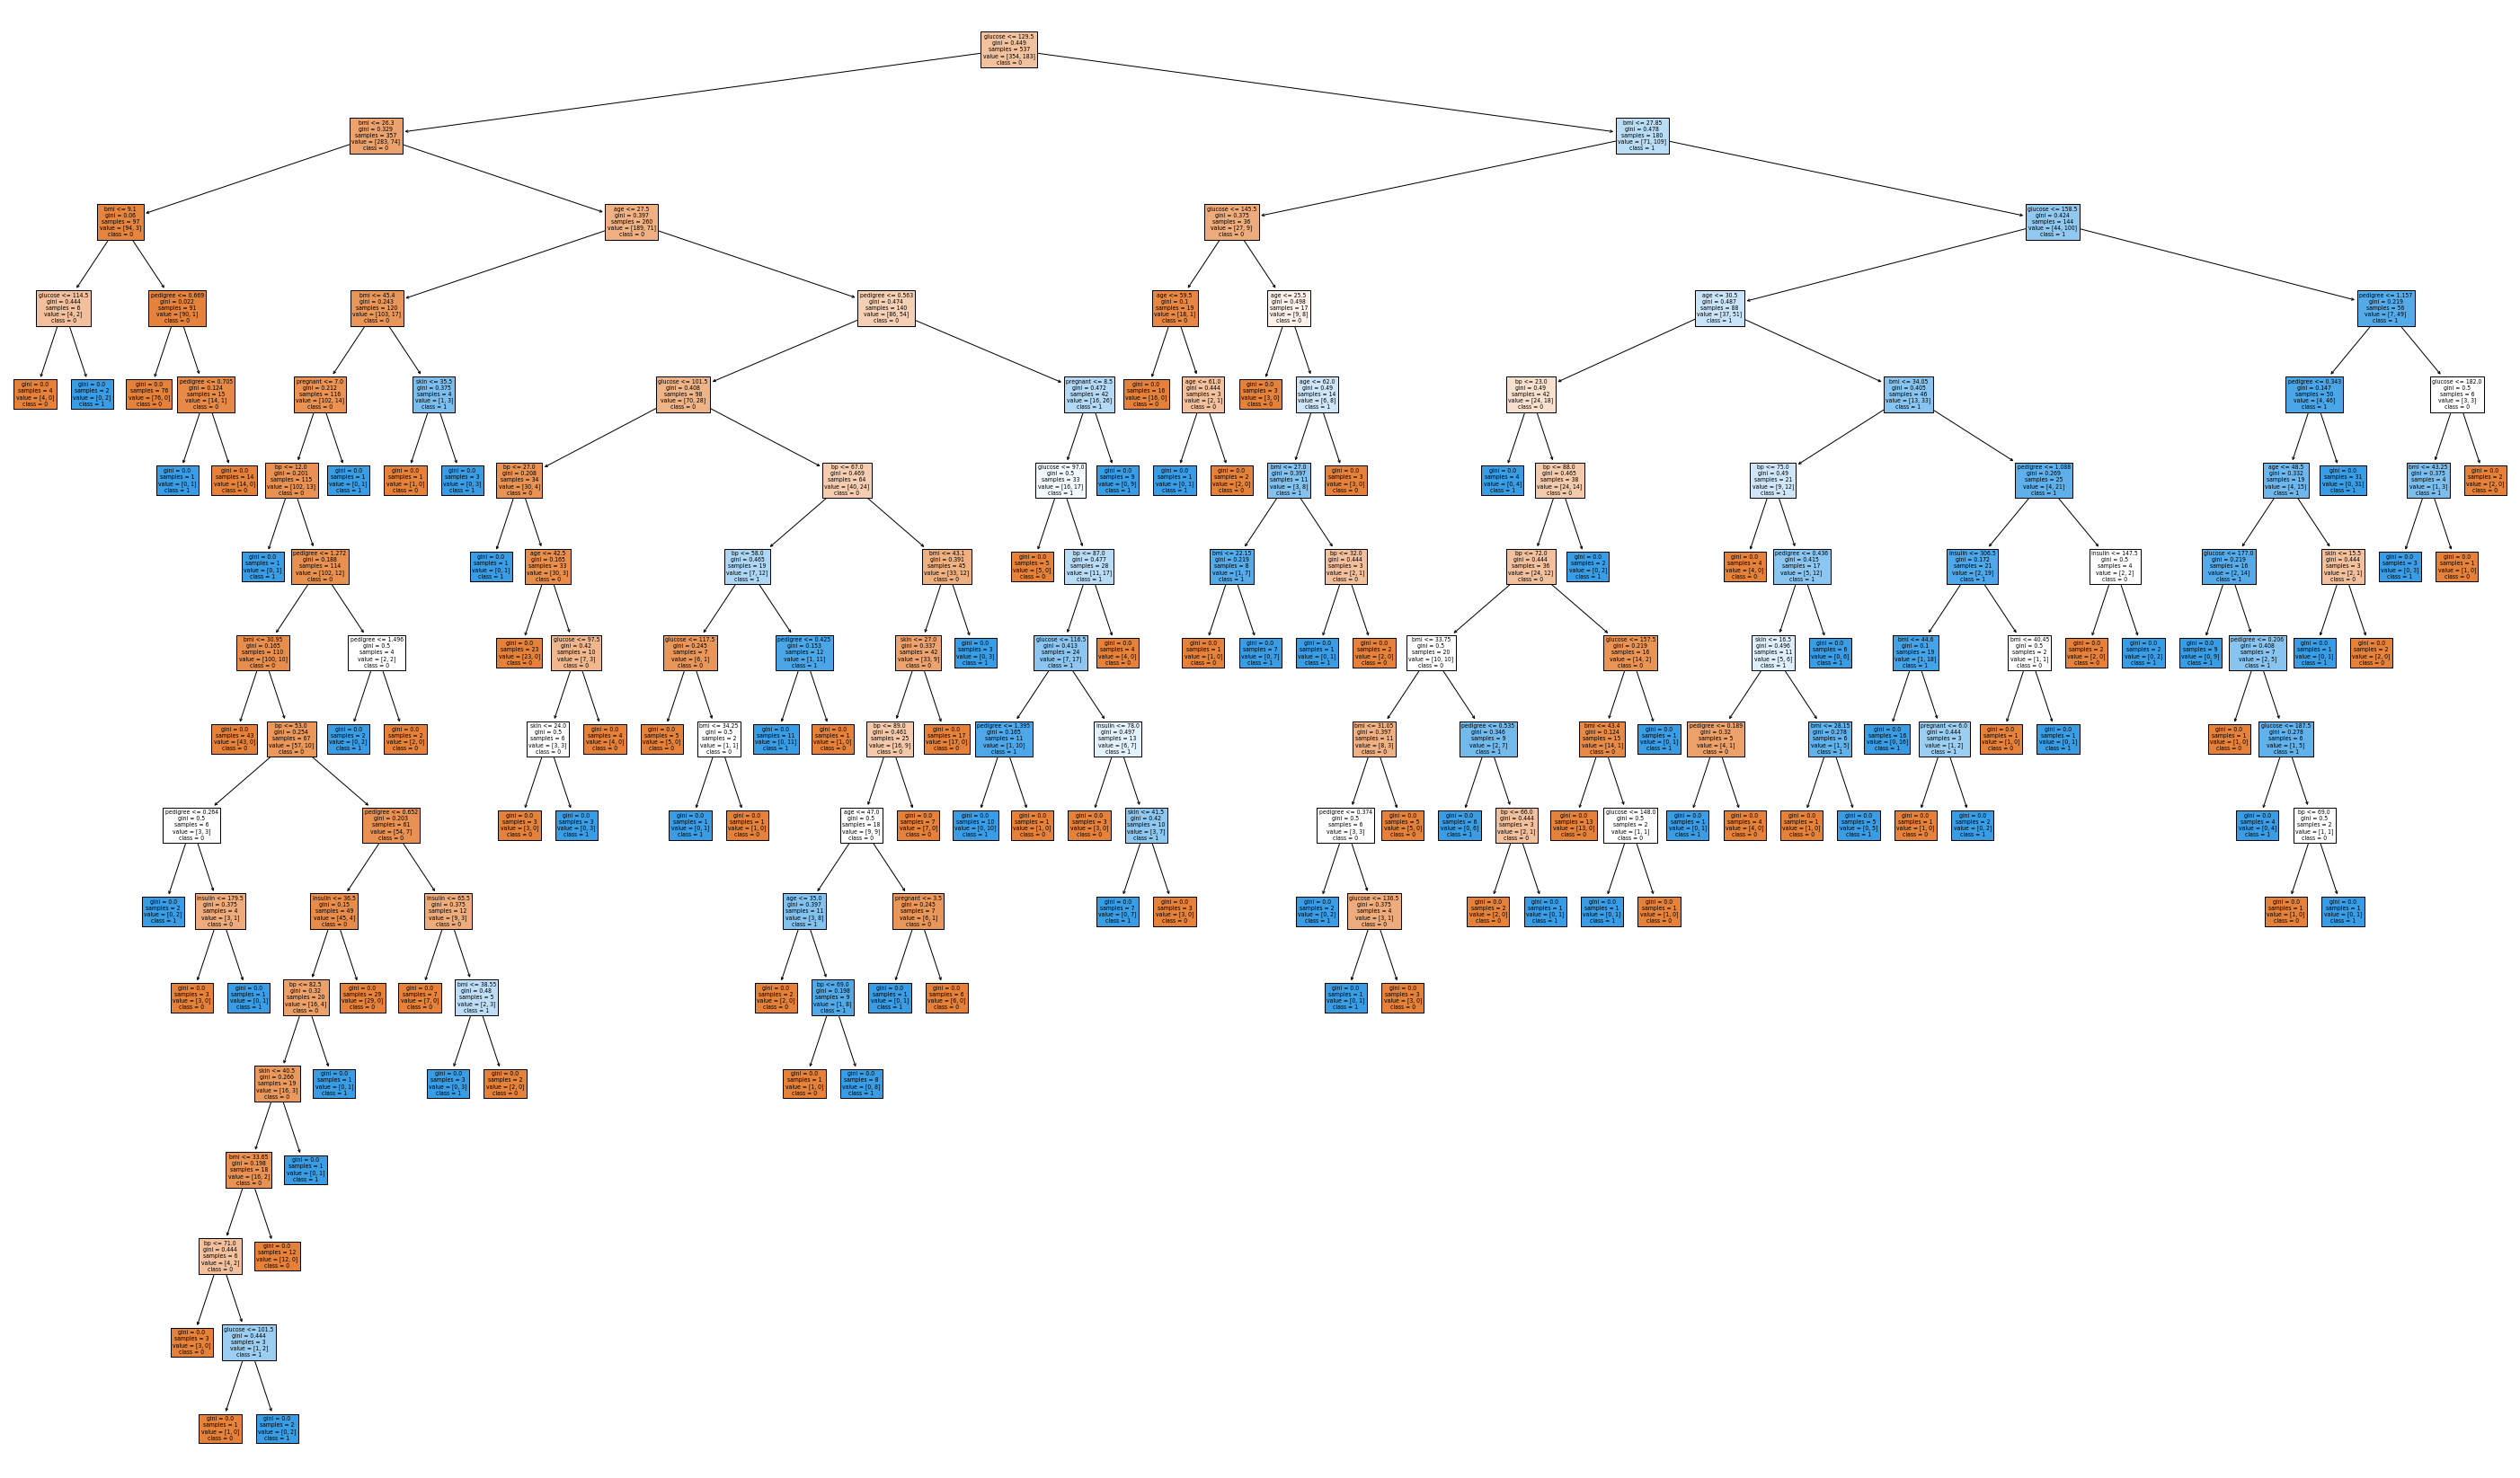

In [44]:
fn = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50, 30))
tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True)
fig.savefig('AIUPBootcamp1_ornek2.png')

In [45]:
#Danışmansız Öğrenme - Kümeleme (Clustering)

In [47]:
"""
1- Centroid-tabanlı kümeleme : K-means
2- Hierachical kümeleme : a - Agglomerative (aşağıdan yukarı), b - Divisive (yukarıdan aşağıya)
3- Density models (Yoğunluk modelleri) : Ex-DBSCAN, OPTICS
"""

'\n1- Centroid-tabanlı kümeleme : K-means\n2- Hierachical kümeleme : a - Agglomerative (aşağıdan yukarı), b - Divisive (yukarıdan aşağıya)\n3- Density models (Yoğunluk modelleri) : Ex-DBSCAN, OPTICS\n'

In [48]:
#Sahte Haber Tespiti, Spam E-posta filtreleme, satış pazarlama, network trafiğini sınıflandırma,
#suç aktivitelerini belirleme, deprem çalışmaları

In [49]:
#wcss, inertia -> within-cluster sum of squared distances, Lloyd-Forgy

In [ ]:
"""
1- Random olarak K adet merkez atar
2- Her noktanın K merkezlerine olan uzaklığını hesaplar ve ilgili kümelere atamaları yapar
3- Her nokta bi kümeye atandıktan sonra, centroid merkezleri yeniden hesaplanır.
4 - 2 ve 3. madde herhangi bir nokta yer değiştirmeyinceye kadar devam eder ve küme tahsisi bir noktadan sonra durur.
"""

In [ ]:
#Elbow Method